# **Support Vector Regression**

## **Data Preprocessing**

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
dataset = pd.read_csv('/content/Position_Salaries.csv')
X = dataset.iloc[: , 1:-1].values
Y = dataset.iloc[: , -1].values

In [57]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [58]:
print(Y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [59]:
Y = Y.reshape(-1,1)
print(Y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


### **Feature Scaling**

this time we have to apply feature scaling, **why**❔

↪ because the SVR model has not explicit equation of the dependent variable (Y) with respect to the features (X's) and mostly there is not those coefficients (B's) multiplying each of the features, that leverage the affect of features that take higher values

this time the **SVR** has implicit equation of (Y) and (X's)  "*which does not have coefficients* "

so we have to apply feature scaling

In [60]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

sc_Y = StandardScaler()
Y = sc_Y.fit_transform(Y)

In [61]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [62]:
print(Y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## **Train the SVR model on the whole dataset**

In [63]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf') #radial basis function kernel
regressor.fit(X, Y)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## **Predicting a new result**

**because we scalled the X and Y** 🔽

⭐ here we have to provide the new value scaled by the X scaler,

⏩ then take the result and make inverse transformation of the scaling transformation so we get the right value

In [64]:
sc_Y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

## **visualizing the results**

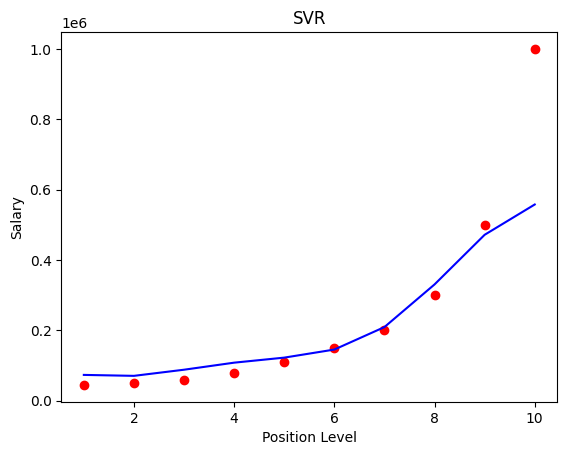

In [65]:
plt.scatter(sc_X.inverse_transform(X), sc_Y.inverse_transform(Y), color='red')
plt.plot(sc_X.inverse_transform(X), sc_Y.inverse_transform(regressor.predict(X).reshape(-1,1)), color='blue')
plt.title('SVR')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

**higher resolution and smoother**

/tmp/ipython-input-1036065375.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)))


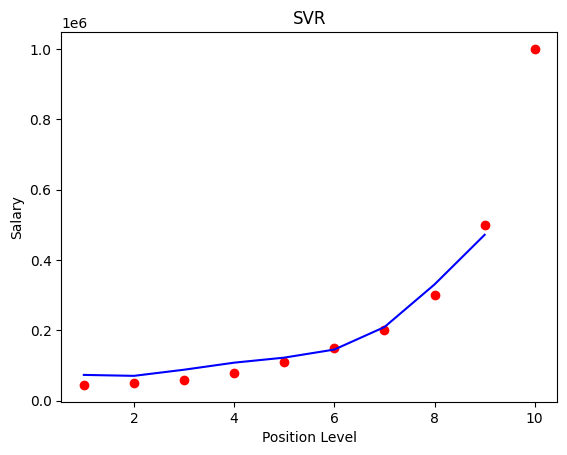

In [66]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)))
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(sc_X.inverse_transform(X) , sc_Y.inverse_transform(Y), color='red')
plt.plot(X_grid, sc_Y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)), color='blue')
plt.title('SVR')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()